In [ ]:
! pip install google_colab_shell
from google_colab_shell import getshell

  Preparing metadata (setup.py) ... done
  Created wheel for google_colab_shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4107 sha256=fa4f46f7e59117a6bdc3a5d2ea279ec9f9b52980829ab5525648f0a0daffa25e
  Stored in directory: /root/.cache/pip/wheels/f9/36/65/95dd4599be065418a9fe1f482674c8e716ce540f3f484681d2
Successfully built google_colab_shell


In [ ]:
#getshell()

In [3]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from google.colab import userdata
ghtoken_moi = userdata.get('ghtoken')

In [ ]:
# initialize request parameters
#url = 'https://api.github.com/user'
url = 'https://api.github.com/search/repositories?q=Q'
headers = {'Authorization': 'Bearer ' + ghtoken_moi}

# send request to GitHub
r = requests.get(url, headers=headers)

# print initial responses
print(r.status_code)
print(r.text)

r_json = json.loads(r.text)
pprint(r_json)

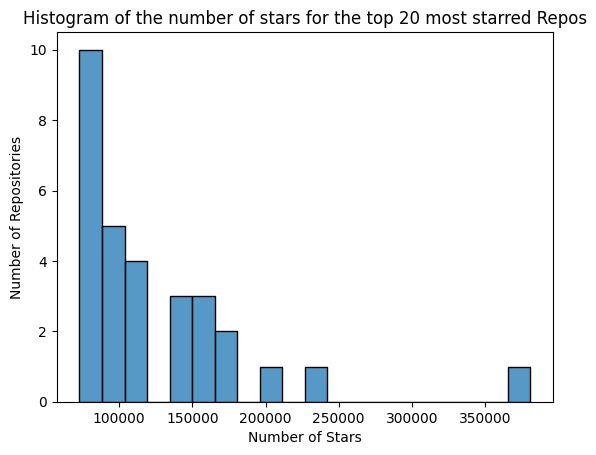

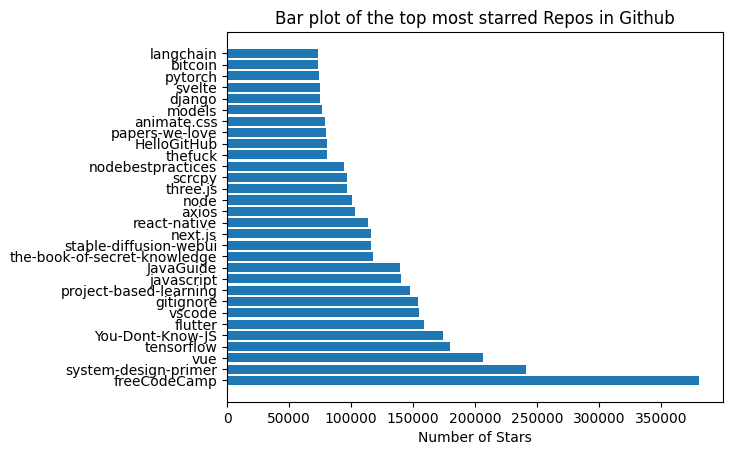

In [15]:
def get_top_starred_repos():
  """
  Function to retrieve the top 20 most starred repositories in GitHub

  Parameters
  ----------

  none

  Returns
  -------

  repos: List()
  A list containing the name and the stargazers_count for the most starred repos

  Examples
  --------
  >>> list_of_repos = get_top_starred_repos()


  """

  # Define the URL for the GitHub API endpoint
  url = f"https://api.github.com/search/repositories?q=stars:%3E1&sort=stars"

  response = requests.get(url)

  if response.status_code != 200:
    raise Exception(f"Error retrieving data from GitHub API: {response.status_code}")

  data = json.loads(response.text)

  # Extract the repository names and star counts from the response
  repos = []
  for item in data["items"]:
    repos.append({"name": item["full_name"], "stars": item["stargazers_count"]})

  return repos

# Function to plot the histogram of the number of stars
def plot_histogram(repos):
  stars = [repo["stars"] for repo in repos]

  # Create a histogram
  sns.histplot(stars, bins=20)
  plt.xlabel("Number of Stars")
  plt.ylabel("Number of Repositories")
  plt.title("Histogram of the number of stars for the top 20 most starred Repos")
  plt.show()

# Function to barplot the stars vs repo name
def bar_plot(repos):
  # Extract the list of star counts and names
  stars = [repo["stars"] for repo in repos]
  names = [repo["name"].split('/')[1] for repo in repos]

  # Create the horizontal barplot
  plt.barh(names, stars)
  plt.xlabel("Number of Stars")
  plt.title("Bar plot of the top most starred Repos in Github")
  plt.show()


repos = get_top_starred_repos()


for i in [plot_histogram(repos), bar_plot(repos)]:
  i


### JAN4


In [13]:

def say_hello(name: str, repeat: int=1, goodbye: bool=False) -> None:
  """A function to print repetitions of hello {string}
  Prints the phrase "Hello {string}" to the stdout of the console

  Parameters
  -----------
  name: str
      the str we want to greet

  repeat: int, default=1
      the number of repetitions to be printed

  goodbye: bool, default=False

  Returns:
  --------

  greting: str
      the desired greeting

  """
  if goodbye:
      message = 'Goodbye'
  else:
      message = 'Hello'

  for _ in range(repeat):
      print(f'{message} {name}!')


say_hello('Martin', 3)

Hello Martin!
Hello Martin!
Hello Martin!


In [ ]:
def say_hello1(name: str, return_str: bool = True) -> Optional[str]:



  if return_str:
    return f'Hello {name}'
  else:
    return None